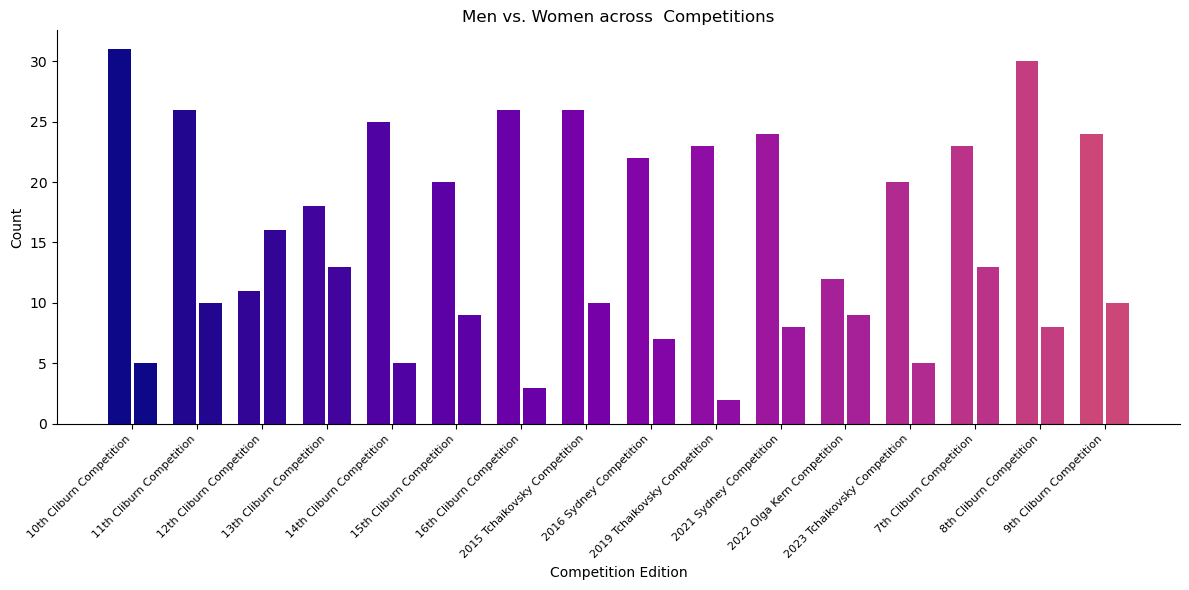

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

df = pd.read_excel("Competition Final List.xlsx", sheet_name="DedupedList")
grouped = df.groupby(["Edition", "Gender"]).size().unstack(fill_value=0)
grouped = grouped.sort_index()
competitions = grouped.index.tolist()
men_counts = grouped.get("Male", [0]*len(competitions))  # Adjust if your male label is "Male" or "m"
women_counts = grouped.get("Female", [0]*len(competitions))  # Adjust if your female label is "Female" or "f"

x = np.arange(len(competitions))
width = 0.35
gap = 0.05
fig, ax = plt.subplots(figsize=(12, 6))

cmap_half = plt.cm.plasma(np.linspace(0, 0.5, 256))
new_cmap = ListedColormap(cmap_half)
men_colors = new_cmap(np.linspace(0, 1, len(men_counts)))
women_colors = new_cmap(np.linspace(0, 1, len(women_counts)))
rects1 = ax.bar(x - width/2 - gap/2, men_counts, width, label='Men', color=men_colors)
rects2 = ax.bar(x + width/2 + gap/2, women_counts, width, label='Women', color=women_colors)

#for each rectangle, when you hover over it, the count of that bar is displayed at the top of the bar


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Competition Edition')
ax.set_ylabel('Count')
ax.set_title('Men vs. Women across  Competitions')
ax.set_xticks(x)
ax.set_xticklabels(competitions, rotation=45, ha="right", fontsize=8)
plt.tight_layout()
plt.show()

